In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder

In [207]:
data = pd.read_csv("laptop_price.csv",encoding='Unicode_escape')

In [208]:
data.shape

(1303, 13)

In [209]:
data

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


# Data Preprocessing

# Company

In [210]:
data = data.drop(data[data['Company']=='Huawei'].index)  # remove huawai from compant beacause it's count is 1

In [211]:
data['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Name: count, dtype: int64

# TypeName

In [212]:
def dd(x):
    return x.replace('Netbook','Notebook')

data["TypeName"] = data["TypeName"].apply(dd) # chage Netbook to Notebook
data["TypeName"]

0                Ultrabook
1                Ultrabook
2                 Notebook
3                Ultrabook
4                Ultrabook
               ...        
1298    2 in 1 Convertible
1299    2 in 1 Convertible
1300              Notebook
1301              Notebook
1302              Notebook
Name: TypeName, Length: 1301, dtype: object

# Screen Resolution

In [213]:
data['Touchscreen']=data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [214]:
data['Touchscreen'].value_counts()

Touchsreen
0    1109
1     192
Name: count, dtype: int64

In [215]:
def ll(x):
    x = x.split(' ')
    return x[-1]

data['ScreenResolution'] = data['ScreenResolution'].apply(ll)

data['ScreenResolution'].value_counts()

ScreenResolution
1920x1080    841
1366x768     308
3840x2160     43
3200x1800     27
2560x1440     23
1600x900      23
2256x1504      6
2304x1440      6
2560x1600      6
1920x1200      5
2880x1800      4
1440x900       4
2400x1600      4
2736x1824      1
Name: count, dtype: int64

In [216]:
data = data.drop(data[data['ScreenResolution']=='2736x1824'].index)
data.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchsreen
0,1,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,0
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,0
2,3,HP,250 G6,Notebook,15.6,1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,0
4,5,Apple,MacBook Pro,Ultrabook,13.3,2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,0


# CPU

In [217]:
data['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       189
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       133
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

# Ram

In [218]:
def ss(x):
    x = x.replace('GB','')   # replace GB with none
    return x

data['Ram'] = data['Ram'].apply(ss)  

'''ram_data = [['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB']]
o_en = OrdinalEncoder(categories=ram_data)
data['Ram'] = o_en.fit_transform(data[['Ram']])'''

"ram_data = [['8GB', '16GB', '4GB', '2GB', '12GB', '6GB', '32GB', '24GB', '64GB']]\no_en = OrdinalEncoder(categories=ram_data)\ndata['Ram'] = o_en.fit_transform(data[['Ram']])"

In [219]:
def ju(x):
    if 'Windows 10 S' in x:
        x = x.replace('Windows 10 S','Windows 10') # replace Windows 10 S to Windows 10
        return x
    elif 'Mac OS X' in x:
        x = x.replace('Mac OS X','macOS')   ## replace Mac OS X to macOS
        return x
    else:
        return x
data['OpSys'] = data['OpSys'].apply(ju)

In [220]:
data = data.drop(data[data['OpSys']=='Android'].index)   # removing android from opsys 

In [221]:
data.dropna(inplace=True)

In [222]:
def gg(x):
    if '/' in x:
        return x.split(' ')[0]
    else:
        return x
    
data['Product'] = data['Product'].apply(gg)  # cleaning product garbadge



In [223]:
'''c_data = [['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG']]
o_en = OrdinalEncoder(categories=c_data)
'''

"c_data = [['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',\n       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',\n       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG']]\no_en = OrdinalEncoder(categories=c_data)\n"

In [224]:
l_en = LabelEncoder()
data['Product'] = l_en.fit_transform(data['Product'])
data['ScreenResolution'] = l_en.fit_transform(data['ScreenResolution'])
data['Cpu'] = l_en.fit_transform(data['Cpu'])
data['Memory'] = l_en.fit_transform(data['Memory'])
data['Gpu'] = l_en.fit_transform(data['Gpu'])
data['Company'] = l_en.fit_transform(data[['Company']])

c:\Users\ADMIN\anaconda3\envs\bia\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [225]:
type_data = [['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation']]
o_en = OrdinalEncoder(categories=type_data)
data['TypeName'] = o_en.fit_transform(data[['TypeName']])

In [226]:
o_data = [['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7']]
o_en = OrdinalEncoder(categories=o_data)
data['OpSys'] = o_en.fit_transform(data[['OpSys']])

In [227]:
def ff(x):
    x = x.replace('kg','')   # replace KG with none
    return x

data['Weight'] = data['Weight'].apply(ff)

In [228]:
data['Weight'] = data['Weight'].astype(float)
data
data['Ram'] = data['Ram'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1298 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1298 non-null   int64  
 1   Company           1298 non-null   int64  
 2   Product           1298 non-null   int64  
 3   TypeName          1298 non-null   float64
 4   Inches            1298 non-null   float64
 5   ScreenResolution  1298 non-null   int64  
 6   Cpu               1298 non-null   int64  
 7   Ram               1298 non-null   int64  
 8   Memory            1298 non-null   int64  
 9   Gpu               1298 non-null   int64  
 10  OpSys             1298 non-null   float64
 11  Weight            1298 non-null   float64
 12  Price_euros       1298 non-null   float64
 13  Touchsreen        1298 non-null   int64  
dtypes: float64(5), int64(9)
memory usage: 152.1 KB


In [229]:
data

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchsreen
0,1,1,296,0.0,13.3,9,65,8,4,58,0.0,1.37,1339.69,0
1,2,1,297,0.0,13.3,1,63,8,2,51,0.0,1.34,898.94,0
2,3,7,50,1.0,15.6,3,74,8,16,53,1.0,1.86,575.00,0
3,4,1,296,0.0,15.4,10,85,16,29,9,0.0,1.83,2537.45,0
4,5,1,296,0.0,13.3,9,67,8,16,59,0.0,1.37,1803.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,9,553,4.0,14.0,3,89,4,4,47,2.0,1.80,638.00,1
1299,1317,9,561,4.0,13.3,11,89,16,29,47,2.0,1.30,1499.00,1
1300,1318,9,193,1.0,14.0,0,34,2,35,40,2.0,1.50,229.00,0
1301,1319,7,2,1.0,15.6,0,89,6,10,21,2.0,2.19,764.00,0


# Remove Outliers

In [230]:
import seaborn as sns

<Axes: xlabel='Price_euros'>

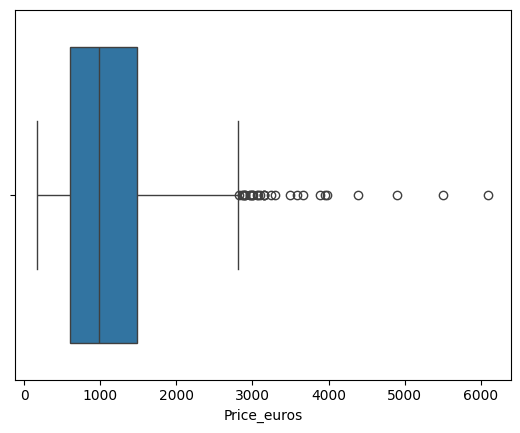

In [231]:
sns.boxplot(data=data,x='Price_euros')  # these Dote is outliers

In [232]:
q1 = data['Price_euros'].quantile(0.25)
q3 = data['Price_euros'].quantile(0.75)
IQR = q3 -q1
IQR                 # data range 25% to 75%

np.float64(889.435)

In [233]:
min_range = q1 - 1.5*IQR
max_range = q3 + 1.5*IQR    # removing Outliers 
min_range,max_range

(np.float64(-735.1524999999999), np.float64(2822.5874999999996))

In [234]:
new_data = data[data['Price_euros']<=max_range]    

<Axes: xlabel='Price_euros'>

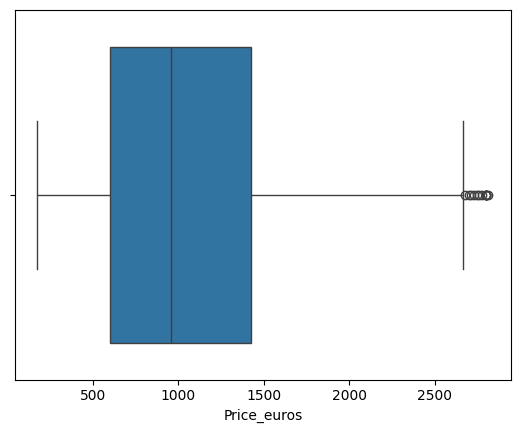

In [235]:
sns.boxplot(data=new_data,x='Price_euros')

In [236]:
new_data

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchsreen
0,1,1,296,0.0,13.3,9,65,8,4,58,0.0,1.37,1339.69,0
1,2,1,297,0.0,13.3,1,63,8,2,51,0.0,1.34,898.94,0
2,3,7,50,1.0,15.6,3,74,8,16,53,1.0,1.86,575.00,0
3,4,1,296,0.0,15.4,10,85,16,29,9,0.0,1.83,2537.45,0
4,5,1,296,0.0,13.3,9,67,8,16,59,0.0,1.37,1803.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,9,553,4.0,14.0,3,89,4,4,47,2.0,1.80,638.00,1
1299,1317,9,561,4.0,13.3,11,89,16,29,47,2.0,1.30,1499.00,1
1300,1318,9,193,1.0,14.0,0,34,2,35,40,2.0,1.50,229.00,0
1301,1319,7,2,1.0,15.6,0,89,6,10,21,2.0,2.19,764.00,0


# Data Spliting

In [237]:
x = new_data.drop(columns=['laptop_ID','Price_euros'])
y = new_data['Price_euros']

In [238]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=55)

# Model Training

In [239]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [240]:
Y_pred =model.predict(X_test)
Y_pred

array([1045.22776784, 1515.64848345, 1196.64473834, 1267.6323947 ,
        434.76742223,  413.13908554,  826.34738349, 1698.65567856,
        452.46081165, 1129.49412344,  632.87877897,  688.57737547,
        403.8932779 ,  664.20980444,  630.6280136 ,  676.83736435,
        699.06332837,  986.91108694,  445.89477816, 1830.04910764,
       1618.64227336, 1520.61341712,  427.18672032, 1177.91138776,
       2092.40074802, 1106.23256793,  164.17157333,  394.97909402,
        712.39311026,  548.93694328, 1237.0174633 , 1690.7312513 ,
       1018.65059633, 1177.50322506, 1181.91607764, 1798.12272155,
        815.23344082, 1015.73851361, 1234.16623624,  687.43997555,
        859.34359963, 1561.52211858, 1256.64253168,  392.81581014,
        930.34999881,  750.47514959,  737.6573069 ,  453.47411226,
       1863.48475062, 1406.45856574, 1591.65435304, 1025.1598664 ,
       1171.02933738, 1093.51096029, 1343.70243833,  410.20720662,
       1213.16670565, 1674.1697134 ,  657.14433782, 1214.27286

In [241]:
mae = mean_absolute_error(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)
print(f'mean_absolute_error : {mae:.2f}')
print(f'mean_squared_error : {mse:.2f}')
print(f'r2_score : {r2:.2f}')

mean_absolute_error : 275.37
mean_squared_error : 121003.53
r2_score : 0.66
